# DBSCAN

# Setup 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import os
os.environ["OMP_NUM_THREADS"] = "8"

from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from kneed import KneeLocator

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
df = pd.read_csv("train_cleaned.csv")

In [4]:
df = df.replace({"explicit": {False:0, True:1}})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  object 
 1   duration_ms       15000 non-null  int64  
 2   explicit          15000 non-null  int64  
 3   popularity        15000 non-null  int64  
 4   artists           15000 non-null  object 
 5   album_name        15000 non-null  object 
 6   danceability      15000 non-null  float64
 7   energy            15000 non-null  float64
 8   key               15000 non-null  int64  
 9   loudness          15000 non-null  float64
 10  speechiness       15000 non-null  float64
 11  acousticness      15000 non-null  float64
 12  instrumentalness  15000 non-null  float64
 13  liveness          15000 non-null  float64
 14  valence           15000 non-null  float64
 15  tempo             15000 non-null  float64
 16  time_signature    15000 non-null  float6

In [6]:
nostrings = df.drop(columns = ['name','artists', 'explicit','album_name','genre'])

In [7]:
nostrings

,duration_ms,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,241760,46,0.690,0.513,5,-12.529,0.0975,0.302000,0.536000,0.2810,0.6350,142.221,4.0
1,444000,0,0.069,0.196,1,-24.801,0.0805,0.283000,0.934000,0.3600,0.0336,75.596,4.0
2,333506,3,0.363,0.854,2,-7.445,0.0397,0.000089,0.800000,0.2620,0.4890,116.628,4.0
3,269800,23,0.523,0.585,5,-5.607,0.0765,0.066400,0.001270,0.1170,0.3850,140.880,4.0
4,307651,25,0.643,0.687,7,-11.340,0.0539,0.000576,0.096900,0.2990,0.6370,143.956,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,432026,0,0.554,0.657,1,-14.232,0.0558,0.016000,0.615000,0.1320,0.0335,117.319,4.0
14996,182746,44,0.103,0.860,1,-19.627,0.0595,0.548000,0.940000,0.1230,0.0016,92.323,3.0
14997,400091,43,0.799,0.535,1,-9.103,0.0594,0.001830,0.857000,0.0713,0.0708,126.000,4.0
14998,197250,37,0.511,0.970,5,-2.299,0.0531,0.000337,0.000014,0.4020,0.2700,160.044,4.0


In [8]:
X = nostrings.values

# MinMax

In [9]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

### DBScan

In [10]:
dbscan = DBSCAN(eps=0.55, min_samples=4)
dbscan.fit(X_minmax)

DBSCAN(eps=0.55, min_samples=4)

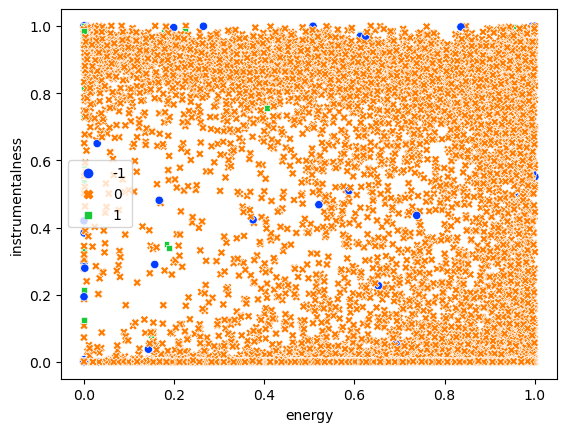

In [11]:
sns.scatterplot(data=df, 
                x="energy", 
                y="instrumentalness", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

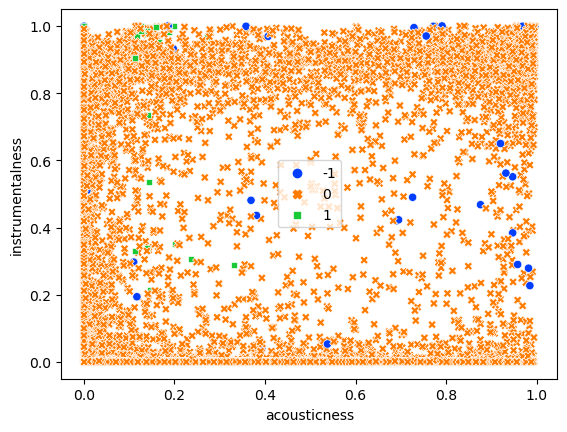

In [12]:
sns.scatterplot(data=df, 
                x="acousticness", 
                y="instrumentalness", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

### kth neighbor distance

In [13]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([   57, 14902,    41], dtype=int64))

In [14]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
print('Silhouette', silhouette_score(X_minmax, dbscan.labels_)) # counting silhouette also w.r.t to noise cluster (-1)
print('Silhouette', silhouette_score(X_minmax[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

Silhouette 0.28197799189146566
Silhouette 0.363945286373393


### kth neighbor distance

In [16]:
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)

In [17]:
dist

array([[0.        , 1.24596327, 0.84958775, ..., 0.84780689, 0.90904515,
        0.6829034 ],
       [1.24596327, 0.        , 0.99791314, ..., 1.09181573, 1.56021374,
        1.58275609],
       [0.84958775, 0.99791314, 0.        , ..., 0.84216872, 0.99966627,
        1.2100576 ],
       ...,
       [0.84780689, 1.09181573, 0.84216872, ..., 0.        , 1.15761714,
        1.3130004 ],
       [0.90904515, 1.56021374, 0.99966627, ..., 1.15761714, 0.        ,
        0.97061467],
       [0.6829034 , 1.58275609, 1.2100576 , ..., 1.3130004 , 0.97061467,
        0.        ]])

In [18]:
#sns.heatmap(dist, cmap="Greens_r", annot=False)
#plt.show()

k=4
kth_distances = []

for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list

kneedle = KneeLocator(range(0, len(kth_distances)), sorted(kth_distances), curve='convex', direction='increasing')

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
plt.xlabel("number of points")

knee_x = kneedle.knee
knee_y = sorted(kth_distances)[knee_x]
plt.hlines(knee_y, plt.xlim()[0], plt.xlim()[1], linestyles='dashed', label='Knee Point', color='red')
plt.scatter(knee_x, knee_y, c='red', marker='o', label='Knee Point')
plt.text(knee_x - 500, knee_y, f' Knee Point ({knee_x}, {knee_y:.2f})', ha='right', va='bottom')

plt.savefig('DBSCAN euclidean 1.png')
plt.show()


ks = [4, 8, 16, 32]

fig = plt.figure(figsize=(16, 3))  # dimensions of the overall plot
fig_dims = (1, len(ks))

for i in range(len(ks)):
    k = ks[i]
    kth_distances = []

    for d in dist:  # d is a vector containing distances between the ith record and all the others
        index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
        kth_distances.append(d[index_kth_distance])  # store the distance in a list

    # Create a KneeLocator object for each subplot
    kneedle = KneeLocator(range(0, len(kth_distances)), sorted(kth_distances), curve='convex', direction='increasing')

    plt.subplot2grid(fig_dims, (0, i))
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('distance from the {}th neighbor'.format(k))

    # Mark the knee point on the plot with y-axis location
    knee_x = kneedle.knee
    knee_y = sorted(kth_distances)[knee_x]
    plt.hlines(knee_y, plt.xlim()[0], plt.xlim()[1], linestyles='dashed', label='Knee Point', color='red')
    plt.scatter(knee_x, knee_y, c='red', marker='o', label='Knee Point')
    plt.text(knee_x - 500, knee_y, f' Knee Point ({knee_x}, {knee_y:.2f})', ha='right', va='bottom')

plt.savefig('DBSCAN euclidean 2.png')
plt.tight_layout()

plt.show()

In [19]:
#print('Silhouette', silhouette_score(dist, dbscan.labels_)) # counting silhouette also w.r.t to noise cluster (-1)
#print('Silhouette', silhouette_score(dist[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

In [20]:
dbscan = DBSCAN(eps=0.65, min_samples=4, metric='precomputed')
dbscan.fit(dist)

DBSCAN(eps=0.65, metric='precomputed', min_samples=4)

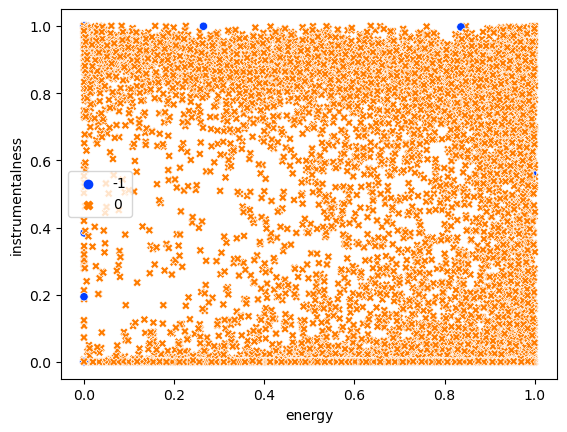

In [21]:
sns.scatterplot(data=df, 
                x="energy", 
                y="instrumentalness", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

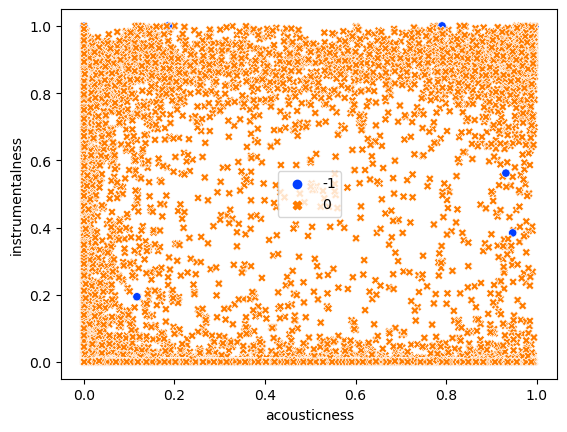

In [22]:
sns.scatterplot(data=df, 
                x="acousticness", 
                y="instrumentalness", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

In [23]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0], dtype=int64), array([   15, 14985], dtype=int64))

In [24]:
df["labels"] = dbscan.labels_

In [25]:
#print('Silhouette', silhouette_score(dist, dbscan.labels_)) # counting silhouette also w.r.t to noise cluster (-1)
#print('Silhouette', silhouette_score(dist[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

sns.pairplot(data=df, hue="labels", palette="bright")
plt.savefig("pairplot DBSCAN euclidean.png")
plt.show()

### Manhattan

In [26]:
dist = pdist(X_minmax, 'cityblock')
dist = squareform(dist)

In [27]:
dist

array([[0.        , 3.50698065, 2.43423676, ..., 2.14681681, 2.39591883,
        1.6687929 ],
       [3.50698065, 0.        , 2.64095679, ..., 2.78813529, 4.37912059,
        4.41059157],
       [2.43423676, 2.64095679, 0.        , ..., 2.06238062, 2.4045863 ,
        3.28243252],
       ...,
       [2.14681681, 2.78813529, 2.06238062, ..., 0.        , 2.88728529,
        2.99513615],
       [2.39591883, 4.37912059, 2.4045863 , ..., 2.88728529, 0.        ,
        2.47121231],
       [1.6687929 , 4.41059157, 3.28243252, ..., 2.99513615, 2.47121231,
        0.        ]])

In [28]:
#sns.heatmap(dist, cmap="Greens_r", annot=False)
#plt.show()

k=4
kth_distances = []

for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list

kneedle = KneeLocator(range(0, len(kth_distances)), sorted(kth_distances), curve='convex', direction='increasing')

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
plt.xlabel("number of points")

knee_x = kneedle.knee
knee_y = sorted(kth_distances)[knee_x]
plt.hlines(knee_y, plt.xlim()[0], plt.xlim()[1], linestyles='dashed', label='Knee Point', color='red')
plt.scatter(knee_x, knee_y, c='red', marker='o', label='Knee Point')
plt.text(knee_x - 500, knee_y, f' Knee Point ({knee_x}, {knee_y:.2f})', ha='right', va='bottom')

plt.savefig('DBSCAN cityblock 1.png')
plt.show()


ks = [4, 8, 16, 32]

fig = plt.figure(figsize=(16, 3))  # dimensions of the overall plot
fig_dims = (1, len(ks))

for i in range(len(ks)):
    k = ks[i]
    kth_distances = []

    for d in dist:  # d is a vector containing distances between the ith record and all the others
        index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
        kth_distances.append(d[index_kth_distance])  # store the distance in a list

    # Create a KneeLocator object for each subplot
    kneedle = KneeLocator(range(0, len(kth_distances)), sorted(kth_distances), curve='convex', direction='increasing')

    plt.subplot2grid(fig_dims, (0, i))
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('distance from the {}th neighbor'.format(k))

    # Mark the knee point on the plot with y-axis location
    knee_x = kneedle.knee
    knee_y = sorted(kth_distances)[knee_x]
    plt.hlines(knee_y, plt.xlim()[0], plt.xlim()[1], linestyles='dashed', label='Knee Point', color='red')
    plt.scatter(knee_x, knee_y, c='red', marker='o', label='Knee Point')
    
    plt.text(knee_x - 500, knee_y, f' Knee Point ({knee_x}, {knee_y:.2f})', ha='right', va='bottom')

plt.tight_layout()
plt.savefig('DBSCAN cityblock 2.png')
plt.show()

In [29]:
#print('Silhouette', silhouette_score(dist, dbscan.labels_)) # counting silhouette also w.r.t to noise cluster (-1)
#print('Silhouette', silhouette_score(dist[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

In [30]:
dbscan = DBSCAN(eps=1.45, min_samples=4, metric='precomputed')
dbscan.fit(dist)

DBSCAN(eps=1.45, metric='precomputed', min_samples=4)

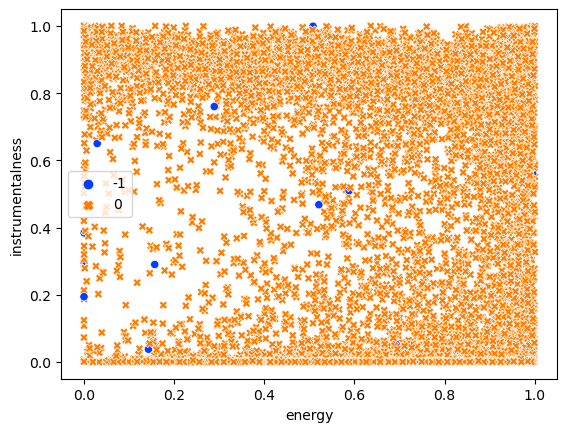

In [31]:
sns.scatterplot(data=df, 
                x="energy", 
                y="instrumentalness", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

In [32]:
sns.scatterplot(data=df, 
                x="loudness", 
                y="duration", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.savefig('loudduraM.png')
plt.show()

ValueError: Could not interpret value `duration` for parameter `y`

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

In [ ]:
df["labels"] = dbscan.labels_

sns.pairplot(data=df, hue="labels", palette="bright")
plt.savefig("pairplot DBSCAN Manhattan.png")
plt.show()

### Jaccard

In [ ]:
dist = pdist(X_minmax, 'jaccard')
dist = squareform(dist)

In [ ]:
dist

In [ ]:
#sns.heatmap(dist, cmap="Greens_r", annot=False)
#plt.show()

k=4
kth_distances = []

for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list

kneedle = KneeLocator(range(0, len(kth_distances)), sorted(kth_distances), curve='convex', direction='increasing')

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
plt.xlabel("number of points")

knee_x = kneedle.knee
knee_y = sorted(kth_distances)[knee_x]
plt.hlines(knee_y, plt.xlim()[0], plt.xlim()[1], linestyles='dashed', label='Knee Point', color='red')
plt.scatter(knee_x, knee_y, c='red', marker='o', label='Knee Point')


plt.savefig('DBSCAN Jaccard 1.png')
plt.show()


ks = [4, 8, 16, 32]

fig = plt.figure(figsize=(16, 3))  # dimensions of the overall plot
fig_dims = (1, len(ks))

for i in range(len(ks)):
    k = ks[i]
    kth_distances = []

    for d in dist:  # d is a vector containing distances between the ith record and all the others
        index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
        kth_distances.append(d[index_kth_distance])  # store the distance in a list

    # Create a KneeLocator object for each subplot
    kneedle = KneeLocator(range(0, len(kth_distances)), sorted(kth_distances), curve='convex', direction='increasing')

    plt.subplot2grid(fig_dims, (0, i))
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('distance from the {}th neighbor'.format(k))

    # Mark the knee point on the plot with y-axis location
    knee_x = kneedle.knee
    knee_y = sorted(kth_distances)[knee_x]
    plt.hlines(knee_y, plt.xlim()[0], plt.xlim()[1], linestyles='dashed', label='Knee Point', color='red')
    plt.scatter(knee_x, knee_y, c='red', marker='o', label='Knee Point')
    
    

plt.tight_layout()
plt.savefig('DBSCAN Jaccard 2.png')
plt.show()

In [ ]:
#print('Silhouette', silhouette_score(dist, dbscan.labels_)) # counting silhouette also w.r.t to noise cluster (-1)
#print('Silhouette', silhouette_score(dist[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

In [ ]:
dbscan = DBSCAN(eps=0.91, min_samples=8, metric='precomputed')
dbscan.fit(dist)

In [ ]:
sns.scatterplot(data=df, 
                x="loudness", 
                y="duration", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.savefig('loudduraM.png')
plt.show()

sns.scatterplot(data=df, 
                x="energy", 
                y="instrumentalness", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

sns.scatterplot(data=df, 
                x="acousticness", 
                y="instrumentalness", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

In [ ]:
#np.unique(dbscan.labels_, return_counts=True)

In [ ]:
df["labels"] = dbscan.labels_

sns.pairplot(data=df, hue="labels", palette="bright")
plt.savefig("pairplot DBSCAN Jaccard.png")
plt.show()